### Задание 1 

Импортируйте библиотеки pandas, numpy и matplotlib. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42. Масштабируйте данные с помощью StandardScaler. Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42. Постройте диаграмму рассеяния на этих данных.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names
boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaleX_trainr(with_mean=False)

In [8]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [9]:
from sklearn.manifold import TSNE

In [12]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [13]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

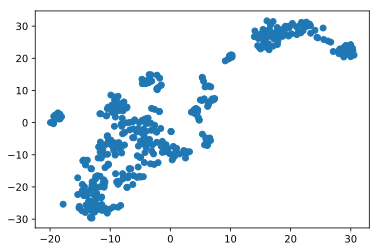

In [17]:
plt.scatter(X_train_tsne[:, 1], X_train_tsne[:, 0])

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [20]:
from sklearn.cluster import KMeans

In [29]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [30]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [31]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

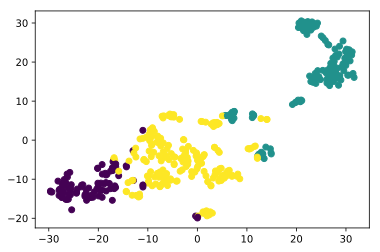

In [50]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [51]:
y_train[labels_train==0].mean()

price    27.788372
dtype: float64

In [35]:
y_train[labels_train==1].mean()

price    16.165354
dtype: float64

In [36]:
y_train[labels_train==2].mean()

price    24.958115
dtype: float64

In [38]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [39]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [40]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

### Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [48]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [53]:
labels_test = kmeans.predict(X_test_scaled)
pd.value_counts(labels_test )

2    51
1    35
0    16
dtype: int64

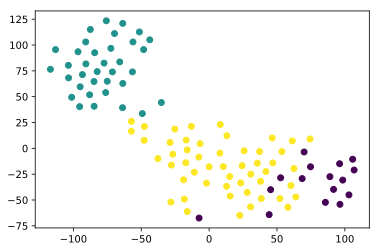

In [54]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

In [55]:
y_test[labels_test==0].mean()

price    31.35
dtype: float64

In [56]:
y_test[labels_test==1].mean()

price    16.437143
dtype: float64

In [57]:
y_test[labels_test==2].mean()

price    21.860784
dtype: float64

In [58]:
X_test.loc[labels_test==0, 'CRIM'].mean()

0.062060000000000004

In [59]:
X_test.loc[labels_test==1, 'CRIM'].mean()

10.165531142857143

In [60]:
X_test.loc[labels_test==2, 'CRIM'].mean()

0.26607882352941176